<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.1

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [88]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [2]:
# Read Titanic Dataset
titanic_csv = 'titanic_train.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [3]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [4]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [5]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [7]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [31]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
False            0
dtype: int64

In [29]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,False
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,29.699118
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,29.699118
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,29.699118
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,29.699118
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,29.699118


## Fill Null Values

Is there any null values in any columns?

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every step

### Age

In [32]:
# ANSWER
#Median is chosen over mean because it does not change because of any outliers
titanic['Age'].fillna(titanic.groupby(['Sex'])['Age'].transform('median'),inplace=True)
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,False
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,29.699118
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,29.699118
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S,29.699118
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,29.699118
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,29.699118


### Cabin

In [47]:
# ANSWER: Flattening data to a simpler form to make infrences 
titanic['Cabin']= titanic['Cabin'].apply(lambda x: x[:1] if type(x) is str else x)
titanic['Cabin'].fillna("X",inplace=True) #replacing NaN with a similar value

In [55]:
#Example of converting categorical data to continuous to fill in null values
#Cabin has so many errors that we probably are not going to use it. This conversion is unusual but could have a niche use.
cab_map = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'T': 8,
    'X': 0,
}
titanic['Cabin'].map(cab_map)
#titanic['Cabin'].fillna(titanic.groupby(['Pclass'])['Cabin'].transform('mean'),inplace=True)
# I dont have NaN values becuae they have been replaced with X. Code should work otherwise.

TypeError: agg function failed [how->mean,dtype->object]

In [43]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,False
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,29.699118
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,29.699118
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,29.699118
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,29.699118
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,29.699118


In [50]:
#checking for proper cabin values
titanic['Cabin'].value_counts()

Cabin
X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

### Embarked

In [56]:
# ANSWER
# titanic['Embarked']= titanic['Embarked'].apply(lambda x: X if type(x) is str else "S") #lambda version
titanic['Embarked'].fillna("S",inplace=True) #replacing NaN with a similar value in this case the mode because of how little effect it will have.

In [57]:
#checking for proper cabin values
titanic['Embarked'].value_counts(dropna=False)
# only 2 NaN out of almost 900. We can either dropped these records or we can replace them with the mode as it will not change the data significantly

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

# Describe

Describe your dataset.

In [60]:
# ANSWER
titanic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [239]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    df_unstack= df_feature.unstack()
    ax = df_unstack.plot(kind='bar', figsize=(15,6))
    
    feature_length= len(df_unstack.iloc[0])
    total= df_unstack.iloc[0]+df_unstack.iloc[1]
    bar_counter=0
    for i in range(0,len(df_unstack.iloc[0])):
        for j in range(0,len(df_unstack)):
            x = ax.patches[bar_counter].get_x()+0.05/feature_length #adjust the numbers (higher numbers = to the right, lower = to the left)
            height = ax.patches[bar_counter].get_height()/2+0.1 #adjust the numbers (higher numbers = up, lower = down)
            value = ("{0:.2f}".format(float((df_unstack.iloc[j][i] /total[i])*100))+'%')
            bar_counter+=1
            ax.text(x, height, value, fontsize=20/(feature_length/2),color='black')
            #ax.text(x,height*2, [j,i], fontsize=10,color='black')#for 
    
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

In [209]:
_agg = {
        'PassengerId': 'count'
    }
_groupby = ['Survived', 'Pclass']

df_feature = titanic.groupby(by=_groupby).agg(_agg)
df_unstack = df_feature.unstack()
total= df_unstack.iloc[0]+df_unstack.iloc[1]
#ax = df_unstack.plot(kind='bar', figsize=(15,6))
#df_unstack.iloc[:2].apply(lambda x: x/df_unstack)
total

             Pclass
PassengerId  1         216
             2         184
             3         491
dtype: int64

In [182]:
ax.patches[0]

In [136]:
#from marco-ostaska to modify. This just shows the percent of the height(??) percentage given does not reflect accurate relation to rest of date
def barplot_values_percent(ax):
    heightlst = []
    for i in ax.patches:
        heightlst.append(i.get_height()/2)
    total = sum(heightlst)
    
    for i in ax.patches:
        x = i.get_x()+0.05 #adjust the numbers (higher numbers = to the right, lower = to the left)
        height = i.get_height()+0.1 #adjust the numbers (higher numbers = up, lower = down)
        value = ("{0:.2f}".format((i.get_height()/total)*100)+'%')
        
        ax.text(x, height, value, fontsize=10/(feature_length/2),color='black')

## Pclass

Use the `bar_charts` function above to view the relationship between survived and pclass.  Note your findings.

C:\Users\willv\AppData\Local\Temp\ipykernel_24008\3567796301.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = ("{0:.2f}".format(float((df_unstack.iloc[j][i] /total[i])*100))+'%')


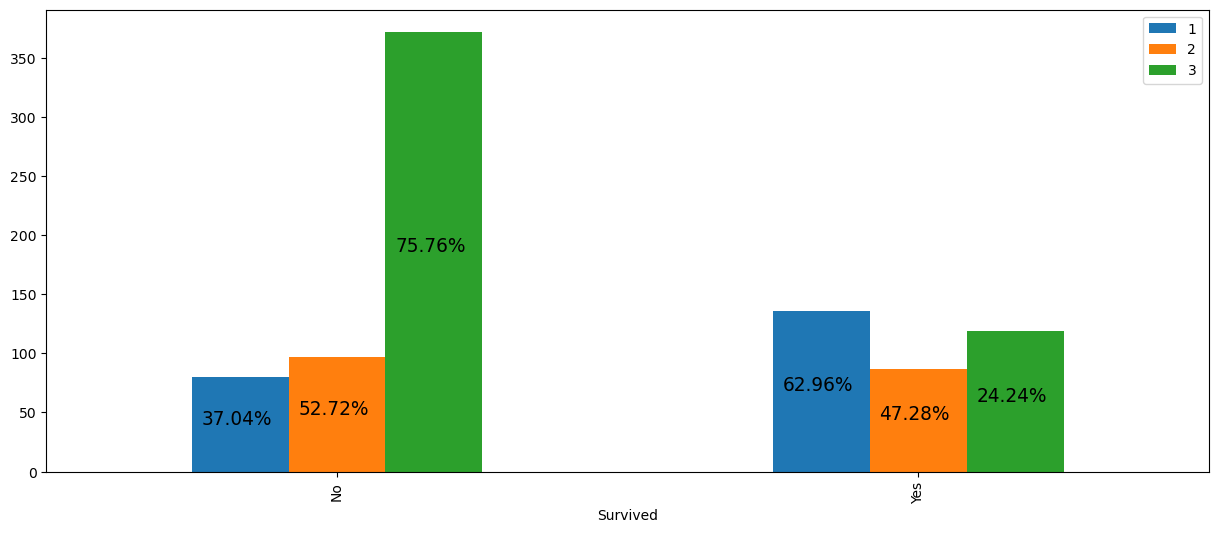

In [240]:
# ANSWER
bar_charts(titanic,'Pclass') #persons in class three had a much lower chance to survive

## Sex

Use `bar_charts` to view the relationship between survived and sex.  Note your findings.

C:\Users\willv\AppData\Local\Temp\ipykernel_24008\3567796301.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = ("{0:.2f}".format(float((df_unstack.iloc[j][i] /total[i])*100))+'%')


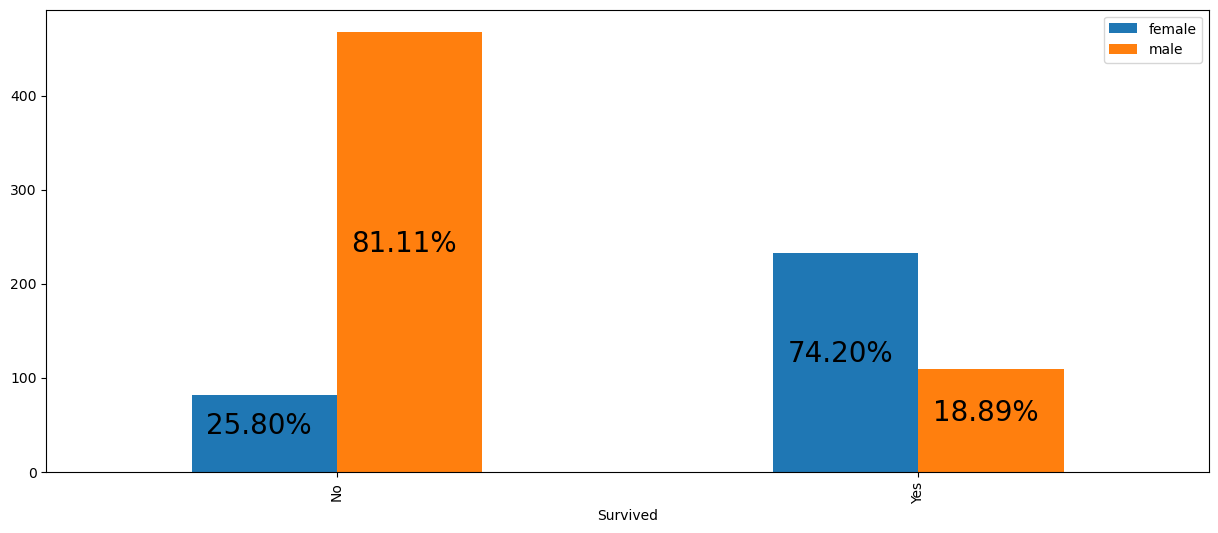

In [241]:
# ANSWER
bar_charts(titanic,'Sex')#women were more likely to survive and more men overall

## Parch

Parch = Number of parents and children travelling with each passenger. Use `bar_charts` to view the relationship between survived and Parch.

C:\Users\willv\AppData\Local\Temp\ipykernel_24008\3567796301.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = ("{0:.2f}".format(float((df_unstack.iloc[j][i] /total[i])*100))+'%')


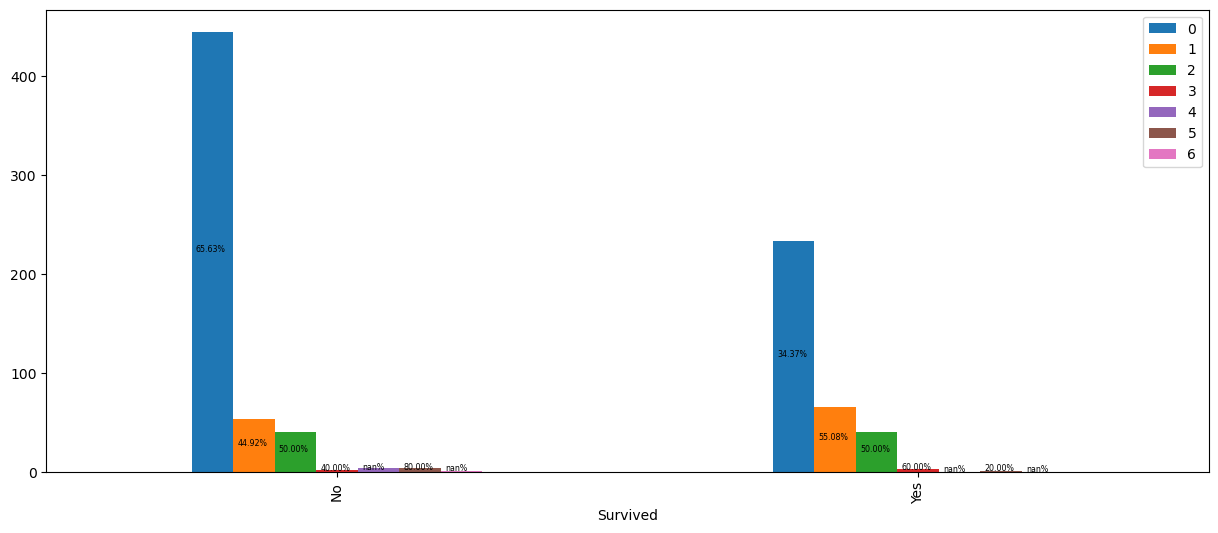

In [242]:
# ANSWER
bar_charts(titanic,'Parch') # little difference but slightly higher chance to survive with 1-2 children.
# overall way more solo travellers and they were much more likely to not survive

## SibSp

SibSp = Number of siblings and spouses travelling with each passenger. Use `bar_charts` to view the relationship between survived and SibSp.

C:\Users\willv\AppData\Local\Temp\ipykernel_24008\3567796301.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = ("{0:.2f}".format(float((df_unstack.iloc[j][i] /total[i])*100))+'%')


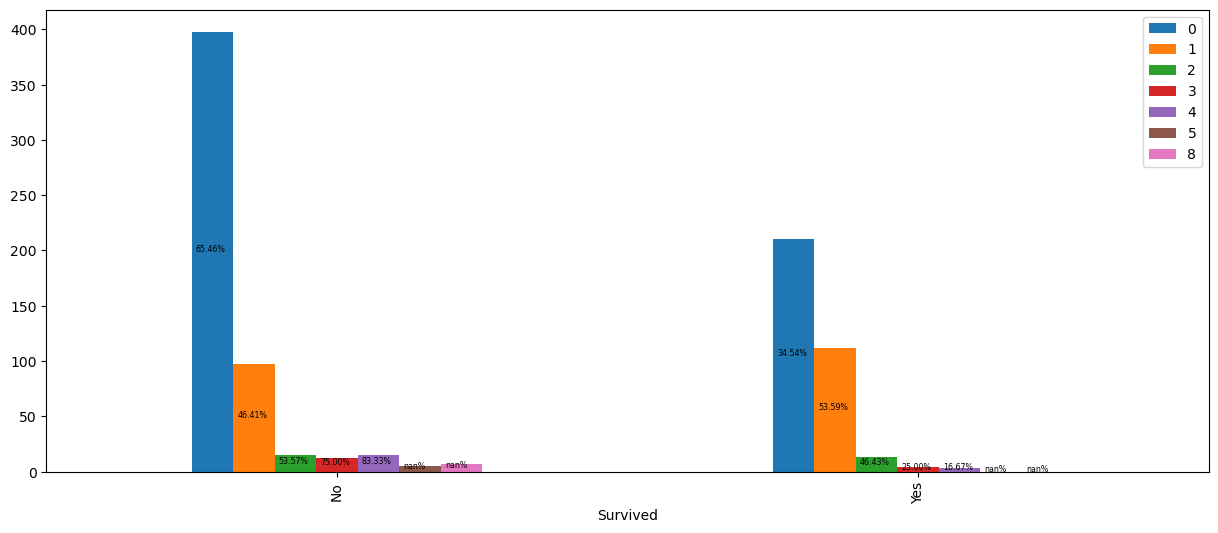

In [243]:
# ANSWER

bar_charts(titanic,'SibSp')#Similar distribution to the Parch variable

## Embarked

Do the same for the Embarked variable.

C:\Users\willv\AppData\Local\Temp\ipykernel_24008\3567796301.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = ("{0:.2f}".format(float((df_unstack.iloc[j][i] /total[i])*100))+'%')


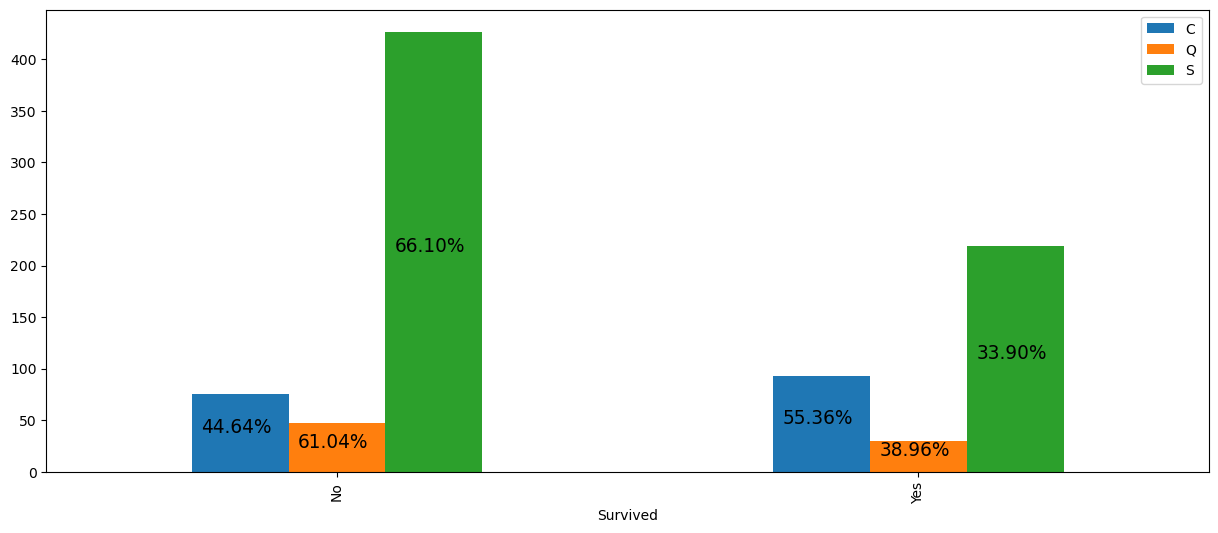

In [244]:
# ANSWER
bar_charts(titanic,'Embarked') #Charleston was the only group to have more survive than did not.

# Feature Engineering

We shall create some new features from the existing features.

## Fare Class

Create a new column 'Fare class' based on their fare as defined below. Is there any relationship between fare and survival?

In [66]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

C:\Users\willv\AppData\Local\Temp\ipykernel_24008\3567796301.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = ("{0:.2f}".format(float((df_unstack.iloc[j][i] /total[i])*100))+'%')


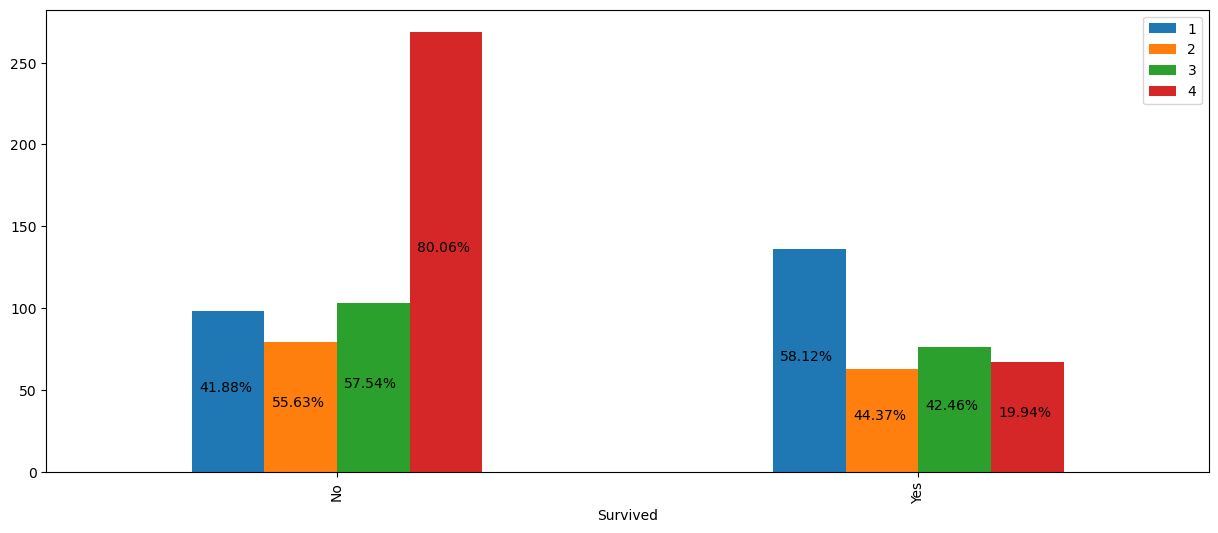

In [245]:
# ANSWER
titanic['Fare_class']= titanic['Fare'].apply(create_fare_class)
bar_charts(titanic,'Fare_class')

## Age Class

Similarly, create a new column 'Age class' based on their age as defined below.

In [71]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

C:\Users\willv\AppData\Local\Temp\ipykernel_24008\3567796301.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = ("{0:.2f}".format(float((df_unstack.iloc[j][i] /total[i])*100))+'%')


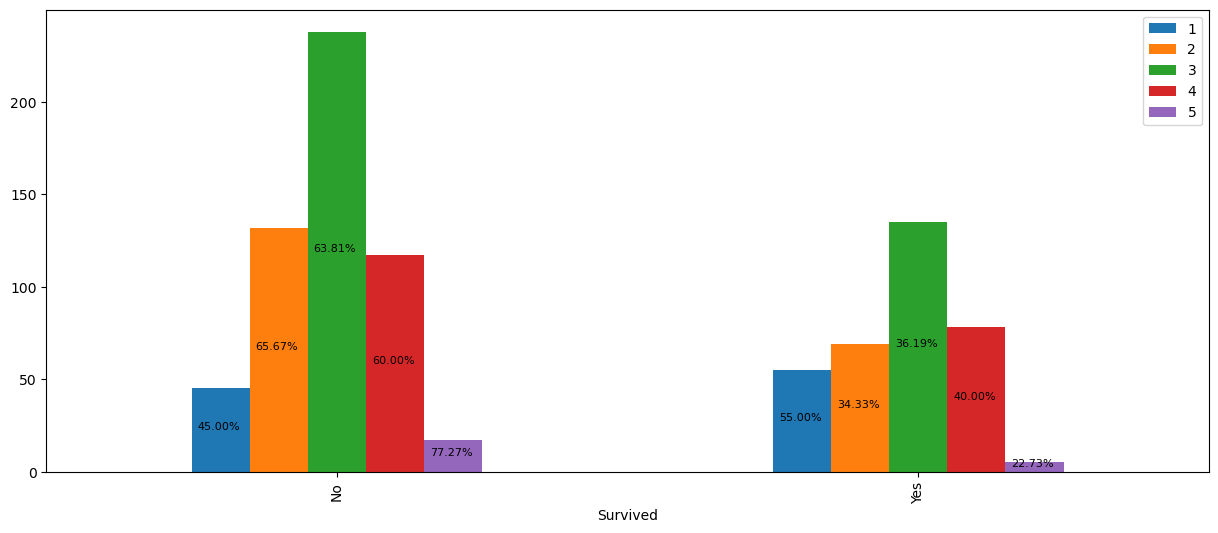

In [246]:
# ANSWER
titanic['Age_class']= titanic['Age'].apply(create_age_class)
bar_charts(titanic,'Age_class')

# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [74]:
# ANSWER
titanic.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,False,Fare_class,Age_class
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,NaN,0.003258,0.026653
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,NaN,-0.307600,-0.067911
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,NaN,0.719670,-0.292128
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,NaN,-0.117248,0.927548
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,NaN,-0.380692,-0.232166
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,NaN,-0.387100,-0.168121
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,NaN,-0.599129,0.075551
False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare_class,0.003258,-0.307600,0.719670,-0.117248,-0.380692,-0.387100,-0.599129,NaN,1.000000,-0.080506
Age_class,0.026653,-0.067911,-0.292128,0.927548,-0.232166,-0.168121,0.075551,NaN,-0.080506,1.000000


# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group.

Collect two sets of data, one with passengers who survived and another one with passengers who died (call them `titanic_survived` and `titanic_died`). The sample sizes should ideally be the same but they can be different. Let's say that the sample sizes are 100.

In [81]:
N=100
# ANSWER
titanic_survived= titanic[titanic.Survived==True]
titanic_died= titanic[titanic.Survived==False]

In [82]:
a = titanic_survived['Age']
b = titanic_died['Age']

### Set alpha (let alpha = 0.05)


In [83]:
# ANSWER
alpha= 0.05


### Calculate test statistic

> Here we identify a test statistic that can be used to assess the truth of the null hypothesis.

In [84]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

In [85]:
## Calculate the t-statistic
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

### Find the p-value

> Next we compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [89]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t
if (t > 0):
    p = 2*(1 - stats.t.cdf(t, df = df))
else:
    p = 2*stats.t.cdf(t, df = df)

In [90]:
print("t = " + str(t))
print("p = " + str(p))

t = -0.9341024868696605
p = 0.35138878196306256


### Interpret results

> The p-value is compared to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [91]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    else:
        print("We fail to reject our null hypothesis.")

In [92]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -1.9394659179476366
p = 0.0527606884758555
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



